In [2]:
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import binarize

In [3]:
# read in data
data = pd.read_csv('Datasets/winequality-red.csv')

# preparing X and y
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
X = data[feature_cols]
y = data.quality

### Training with different models

In [84]:
# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred_logreg = logreg.predict(X)

# Accuracy of Logistic Regression Model
print(metrics.accuracy_score(y, y_pred_logreg))

0.5834896810506567


In [85]:
# K-Nearest Neighbors Model (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred_k5 = knn.predict(X)

# Accuracy of KNN (K=5) Model
print(metrics.accuracy_score(y, y_pred_k5))

0.6704190118824265


In [86]:
# K-Nearest Neighbors Model (K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred_k1 = knn.predict(X)

# Accuracy of KNN (K=1) Model
print(metrics.accuracy_score(y, y_pred_k1))

1.0


### Dummy classifier (simple baseline accuracy prediction)

In [87]:
dummy = DummyClassifier()
dummy.fit(X, y)
y_pred_dummy = dummy.predict(X)

# Accuracy of KNN (K=1) Model
print(metrics.accuracy_score(y, y_pred_dummy))

0.34083802376485306


### Model evaluation: Train/Test Split

In [103]:
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

# Train the model on the training set, make predictions on testing set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# calculate accuracy (Logistic Regression)
print(metrics.accuracy_score(y_test, y_pred))

0.5795454545454546


In [89]:
# Repeat for KNN (K=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.4625


In [90]:
# Repeat for KNN (K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))

0.6


### Locate better K value

In [91]:
scores = []
for K in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

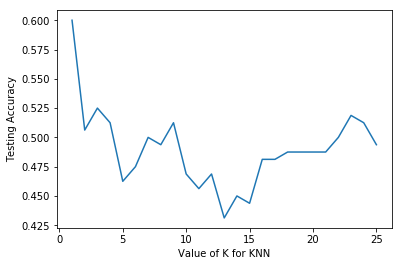

In [92]:
# Plot the different values of K and accuracy for each
%matplotlib inline

plt.plot(range(1, 26), scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

### Cross-validation to find best K value

Text(0, 0.5, 'Cross-Validation Accuracy')

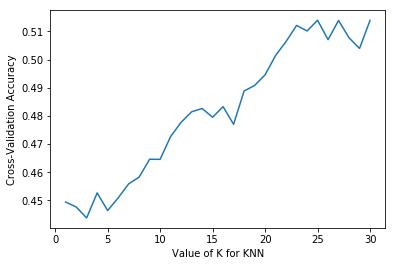

In [93]:
# Search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for K in k_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    

# Visualize the value for K versus the CV accuracy
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')

In [94]:
# 10-fold CV with the approximate best KNN model (K=23)
knn = KNeighborsClassifier(n_neighbors=23)
print( cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean() )

0.5121270369430944


In [95]:
# 10-fold CV with logistic regression
logreg = LogisticRegression()
print( cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean() )

0.5761439303153966


### GridSearchCV for parameter tuning

In [39]:
k_range = range(1, 31)

# map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# fit the grid with data
grid.fit(X, y)

# view the accuracy scores
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.449656,0.039148,{'n_neighbors': 1}
1,0.447780,0.034612,{'n_neighbors': 2}
2,0.444028,0.060068,{'n_neighbors': 3}
3,0.452783,0.051233,{'n_neighbors': 4}
4,0.446529,0.048183,{'n_neighbors': 5}
5,0.450907,0.043493,{'n_neighbors': 6}
6,0.455910,0.038528,{'n_neighbors': 7}
7,0.458412,0.041183,{'n_neighbors': 8}
8,0.464665,0.038260,{'n_neighbors': 9}
9,0.464665,0.028229,{'n_neighbors': 10}


In [49]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5140712945590994
{'n_neighbors': 25}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=25, p=2,
           weights='uniform')


### Searching multiple parameters simultaneously (with GridSearchCV)

In [101]:
# define the param values that should be searched (using KNN for this example)
weight_options = ['uniform', 'distance']

# create param grid: map the param names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weight_options)

# create and fit the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [102]:
# view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.449656,0.039148,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.449656,0.039148,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.447780,0.034612,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.449656,0.039148,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.444028,0.060068,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.459037,0.053156,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.452783,0.051233,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.456535,0.051405,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.446529,0.048183,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.456535,0.044383,"{'n_neighbors': 5, 'weights': 'distance'}"


In [100]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.5159474671669794
{'n_neighbors': 24, 'weights': 'distance'}


### Null accuracy: predict the most frequent class

In [99]:
# class distribution of the testing set
print(y_test.value_counts())

5    68
6    67
7    15
4     7
8     2
3     1
Name: quality, dtype: int64


In [98]:
# calculate the percentage of 5's
print(68 / y_test.count())

0.425


## Confusion Matrix

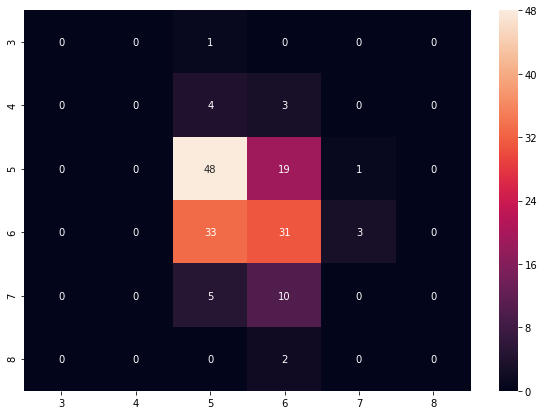

In [96]:
# first argument is true values, second argument is predicted values
confusion = metrics.confusion_matrix(y_test, y_pred)

# visualize confusion matrix
df_cm = pd.DataFrame(confusion, index = [i for i in range(3, 9)], columns = [i for i in range(3, 9)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [97]:
# How often is the classifier correct?
print(metrics.accuracy_score(y_test, y_pred))

0.49375
